# Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report

# Part 1: Data Preprocessing

In [6]:
# Load the Dataset
df = pd.read_csv('Netflix_Userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
# Handle Missing Values
df.isna().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [8]:
#  Encode Categorical Variables
df_dummies = pd.get_dummies(df, columns=['Subscription Type', 'Device','Gender','Plan Duration','Country'])

In [9]:
# Feature Selection
X = df_dummies.drop(['User ID','Monthly Revenue','Join Date','Last Payment Date'],axis=1)
Y = df_dummies['Monthly Revenue']

# Part 2: Exploratory Data Analysis (EDA)

In [10]:
# Descriptive Statistics
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


**Visualizations**

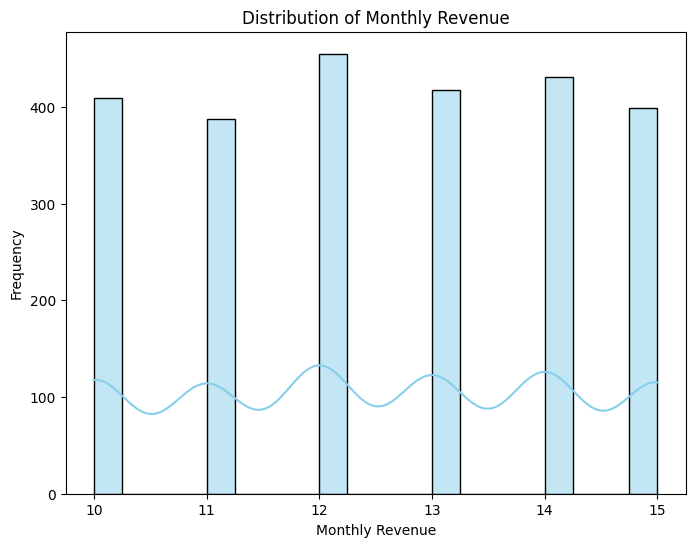

In [11]:
# Distribution of Monthly Revenue
plt.figure(figsize=(8, 6))
sns.histplot(df['Monthly Revenue'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

<ipython-input-12-731e16118c58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


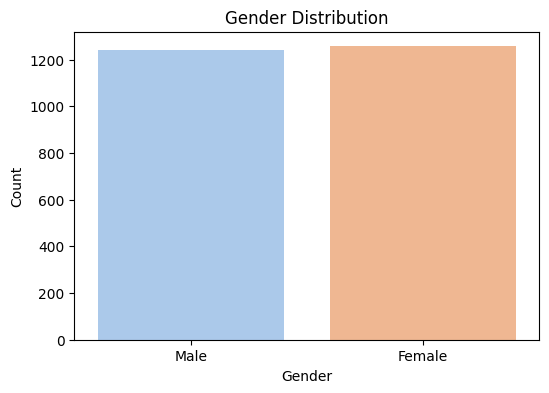

In [12]:
# User Demographics (Gender Distribution)
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Part 3: Linear Regression Model (Predicting Monthly Revenue)

**Build the model**

In [13]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Train the model
model_linear = LinearRegression()
model_linear.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Predict on the Test Set
Y_pred = model_linear.predict(X_test)

**Model Evaluation**

In [16]:
#Evaluate model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2.8189145806989555
Root Mean Squared Error: 1.6789623523768946
R-squared: -0.02054865137919637


# Part 4: Logistic Regression Model (Predicting Customer Feedback)

In [17]:
# Model Building
model_logistic = LogisticRegression()
model_logistic.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# Predict on the Test Set
Y_pred = model_logistic.predict(X_test)

In [19]:
# Evaluate
accuracy = accuracy_score(Y_test,Y_pred)
conf_matrix = confusion_matrix(Y_test,Y_pred)
class_report = classification_report(Y_test,Y_pred)

print(f'Accuracy          :   {accuracy}')
print(f'Confusion Matrix  :   {conf_matrix}')
print(f'Class Report      :\n   {class_report}')

Accuracy          :   0.186
Confusion Matrix  :   [[11 10 25 14  9 16]
 [11  7 24  8 18 11]
 [18  5 30  9 14 17]
 [17  7 27 11 14 12]
 [ 9 11 26  9 19 11]
 [ 6  9 22  6 12 15]]
Class Report      :
                 precision    recall  f1-score   support

          10       0.15      0.13      0.14        85
          11       0.14      0.09      0.11        79
          12       0.19      0.32      0.24        93
          13       0.19      0.12      0.15        88
          14       0.22      0.22      0.22        85
          15       0.18      0.21      0.20        70

    accuracy                           0.19       500
   macro avg       0.18      0.18      0.18       500
weighted avg       0.18      0.19      0.18       500



# Part 5: Comparative Analysis and Visualization

In [20]:
# Feature Importance (Linear Regression)
feature_importance_lr = pd.Series(model_linear.coef_, index=X.columns)
print("Linear Regression Feature Importance:")
print(feature_importance_lr)

# Feature Importance (Logistic Regression)
model_logreg = LogisticRegression()
model_logreg.fit(X, Y)

# Get absolute feature coefficients
feature_importance_logreg = pd.Series(np.abs(model_logreg.coef_[0]), index=X.columns)
print("\nLogistic Regression Feature Importance:")
print(feature_importance_logreg)

Linear Regression Feature Importance:
Age                          -8.752316e-03
Subscription Type_Basic      -8.712118e-02
Subscription Type_Premium     9.277764e-02
Subscription Type_Standard   -5.656467e-03
Device_Laptop                 1.389726e-01
Device_Smart TV              -8.961517e-02
Device_Smartphone            -1.107942e-01
Device_Tablet                 6.143669e-02
Gender_Female                 7.555173e-04
Gender_Male                  -7.555173e-04
Plan Duration_1 Month         1.110223e-16
Country_Australia            -1.582928e-01
Country_Brazil                5.689589e-02
Country_Canada                4.155823e-03
Country_France               -5.517517e-03
Country_Germany              -1.270077e-01
Country_Italy                 3.506841e-01
Country_Mexico               -2.246770e-01
Country_Spain                 4.369797e-02
Country_United Kingdom       -3.473997e-04
Country_United States         6.040852e-02
dtype: float64

Logistic Regression Feature Importance:
Age

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


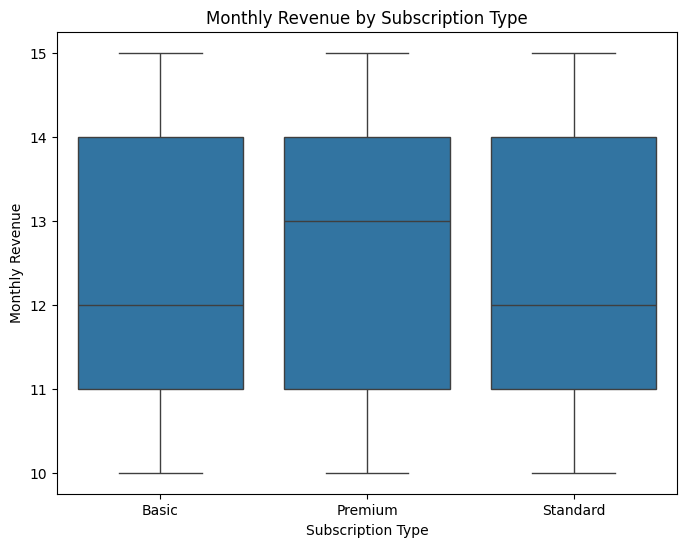

In [21]:
# Visualizing Monthly Revenue by Subscription Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription Type', y='Monthly Revenue', data=df)
plt.title('Monthly Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Monthly Revenue')
plt.show()